In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import plotly
from plotly.graph_objects import *
from plotly.graph_objs import *
import plotly.graph_objects as go
import numpy as np

plt.rcParams['figure.figsize'] = [12, 7]
plt.rcParams['figure.dpi'] = 130 

def draw_carpet(x,y,z,xname,yname,zname):
    fig = go.Figure()
    fig.add_trace(go.Carpet(
    	a=x,
    	b=y,
    	y=z,
    	cheaterslope=0.8,
    	aaxis=dict(
        	title = xname,
        	smoothing=0.1,
        	minorgridcount=10
    	),
    	baxis=dict(
        	title =yname,
        	smoothing=0.2,
        	minorgridcount=10,
    	), yaxis = "y"
))
    fig.update_yaxes(title=zname)
    fig.show()
    
def draw_figure(x, y1, y2, labelx, labely1, labely2):
    fig, host = plt.subplots()
    par1 = host.twinx()
    par1.set_ylabel(labely2)
    p1, = host.plot(x, y1, label=labely1)
    p2, = par1.plot(x, y2, label=labely2, color='r')
    host.set_ylabel(labely1)
    host.set_xlabel(labelx)
    host.tick_params(axis='y', colors=p1.get_color())
    par1.tick_params(axis='y', colors=p2.get_color())
    plt.grid()
    plt.draw()
    plt.show()
    
def draw_figure_alt_mach_multi(xdf, y1df, y2df, n1, n2, labelx, labely1, labely2, input1, input2):
    fig, axs = plt.subplots(n1,n2, sharex=True, sharey=True)
    fig.suptitle("x = "+labelx+", y_blue = "+labely1+", y_red = "+labely2)
    fig.subplots_adjust(right=0.75)
    for i in range(n1):
        for j in range(n2):
            y1 = np.array(y1df[n2*i+j].split(']')[0].split('[')[1].split()).astype(float)
            y2 = np.array(y2df[n2*i+j].split(']')[0].split('[')[1].split()).astype(float)
            x = np.array(xdf[n2*i+j].split(']')[0].split('[')[1].split()).astype(float)
            host = axs[i,j]    
            par1 = host.twinx()
            p1, = host.plot(x, y1)
            p2, = par1.plot(x, y2, color='r')
            host.tick_params(axis='y', colors=p1.get_color())
            par1.tick_params(axis='y', colors=p2.get_color())
            host.set_title("wa={} m2, fd={} m".format(round(input1[n2*i+j]),round(input2[n2*i+j],1)),fontsize=6)
            if ((j+1) % n2 != 0):
                par1.tick_params('y', labelright=False) 
    plt.grid()
    plt.draw()
    plt.show()

In [4]:
path = os.getcwd()
print(path)
input = pd.read_csv(path + "/Results/analysis_input_refstudy.csv")
output = pd.read_csv(path + "/Results/analysis_output_refstudy.csv")


c:\Users\aarc8\Documents\GitHub\MDOAirB_base\framework


In [5]:
print("Failure rate = ",output["design_status"].sum()/output["status"].count()*100,"%")

Failure rate =  22.22222222222222 %


In [6]:
input

,WingArea,x1,x2,x3,x4,x5,x6,x7,x8,x9,FanDiameter,x11,x12,x13,x14,x15
0,150.0,117.600000,30.0,25.0,-2.25,38.5,250.0,6.0,3000.0,80.0,22.726,27.0,1350.0,15.0,38000.0,78.0
1,150.0,117.600000,30.0,25.0,-2.25,38.5,250.0,6.0,3000.0,80.0,22.000,27.0,1350.0,15.0,38000.0,78.0
2,150.0,117.600000,30.0,25.0,-2.25,38.5,250.0,6.0,3000.0,80.0,21.252,27.0,1350.0,15.0,38000.0,78.0
3,155.0,113.806452,30.0,25.0,-2.25,38.5,250.0,6.0,3000.0,80.0,22.726,27.0,1350.0,15.0,38000.0,78.0
4,155.0,113.806452,30.0,25.0,-2.25,38.5,250.0,6.0,3000.0,80.0,22.000,27.0,1350.0,15.0,38000.0,78.0
5,155.0,113.806452,30.0,25.0,-2.25,38.5,250.0,6.0,3000.0,80.0,21.252,27.0,1350.0,15.0,38000.0,78.0
6,160.0,110.250000,30.0,25.0,-2.25,38.5,250.0,6.0,3000.0,80.0,22.726,27.0,1350.0,15.0,38000.0,78.0
7,160.0,110.250000,30.0,25.0,-2.25,38.5,250.0,6.0,3000.0,80.0,22.000,27.0,1350.0,15.0,38000.0,78.0
8,160.0,110.250000,30.0,25.0,-2.25,38.5,250.0,6.0,3000.0,80.0,21.252,27.0,1350.0,15.0,38000.0,78.0


In [7]:
output.head()

,MTOW,DOC,fuel_mass,total_mission_flight_time,mach,passenger_capacity,SAR,landing_field_length_computed,takeoff_field_length_computed,app_speed,...,mass,time,sfc,thrust,CL,CD,LoD,throttle,vcas,OWE
0,116026.431295,12523.376634,5846.069505,219.937266,[0.43446873 0.43446873 0.43446873 0.43446877 0...,243.0,7.307587,1981.336465,1869.374289,72.932657,...,[96157.52562545 96157.52562543 96157.52562542 ...,[0.00000000e+00 1.10394886e-10 2.20789772e-10 ...,[0.42130741 0.42130741 0.42130741 0.42130742 0...,[101930.46912058 101930.46911954 101930.469118...,[0.49584425 0.49584425 0.49584425 0.49584426 0...,[0.02771824 0.02771824 0.02771824 0.02771824 0...,[17.88873512 17.88873512 17.88873512 17.888735...,[0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 ...,[280.00000474 280.00000474 280.00000474 280.00...,60341.058569
1,115375.382343,12371.090804,5819.243526,219.979575,[0.43446873 0.43446873 0.43446873 0.43446877 0...,244.0,7.274054,1967.824010,1982.229927,72.646666,...,[95379.84616409 95379.84616407 95379.84616406 ...,[0.00000000e+00 1.10221320e-10 2.20442640e-10 ...,[0.42130741 0.42130741 0.42130741 0.42130742 0...,[95521.99406102 95521.99406012 95521.99405923 ...,[0.49183409 0.49183409 0.49183409 0.49183409 0...,[0.0275889 0.0275889 0.0275889 0.0275889 0...,[17.82724733 17.82724733 17.82724733 17.827247...,[0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 ...,[280.00000474 280.00000474 280.00000474 280.00...,59563.230692
2,114455.939799,12217.199814,5797.096976,220.187225,[0.43446873 0.43446873 0.43446873 0.43446876 0...,245.0,7.246371,1954.450100,2104.303712,72.362493,...,[94718.61882105 94718.61882104 94718.61882102 ...,[0.00000000e+00 1.10057665e-10 2.20115331e-10 ...,[0.42130741 0.42130741 0.42130741 0.42130741 0...,[89136.92189001 89136.92188924 89136.92188847 ...,[0.48842441 0.48842441 0.48842441 0.48842442 0...,[0.02747943 0.02747943 0.02747943 0.02747943 0...,[17.77418058 17.77418058 17.77418058 17.774180...,[0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 ...,[280.00000474 280.00000474 280.00000474 280.00...,58775.421078
3,116132.759929,12620.431428,5823.549741,221.295197,[0.43446873 0.43446873 0.43446873 0.43446877 0...,243.0,7.279437,1920.050393,1820.153262,71.626381,...,[95835.63258433 95835.63258431 95835.6325843 ...,[0.00000000e+00 1.10397794e-10 2.20795587e-10 ...,[0.42130741 0.42130741 0.42130741 0.42130742 0...,[101930.46912058 101930.46911954 101930.469118...,[0.47824295 0.47824295 0.47824295 0.47824296 0...,[0.02698834 0.02698834 0.02698834 0.02698834 0...,[17.72035754 17.72035754 17.72035754 17.720357...,[0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 ...,[280.00000474 280.00000474 280.00000474 280.00...,60089.043494
4,115450.745704,12453.930275,5815.954878,221.078900,[0.43446873 0.43446873 0.43446873 0.43446877 0...,245.0,7.269944,1910.915520,1928.710795,71.429630,...,[95310.12463762 95310.12463761 95310.12463759 ...,[0.00000000e+00 1.10216860e-10 2.20433721e-10 ...,[0.42130741 0.42130741 0.42130741 0.42130742 0...,[95521.99406102 95521.99406013 95521.99405923 ...,[0.47562054 0.47562054 0.47562054 0.47562055 0...,[0.02690536 0.02690536 0.02690536 0.02690536 0...,[17.67753974 17.67753974 17.67753974 17.677539...,[0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 ...,[280.00000474 280.00000474 280.00000474 280.00...,59358.098187


In [8]:
draw_carpet(input["WingArea"],input["FanDiameter"]/10,output["fuel_mass"],'Wing Area (m2)',"Fan Diameter (m)","Fuel (kg)")

In [9]:
draw_carpet(input["WingArea"],input["FanDiameter"]/10,output["DOC"],'Wing Area (m2)',"Fan Diameter (m)","DOC ($)")


In [10]:
draw_carpet(input["WingArea"],input["FanDiameter"],output["takeoff_field_length_computed"],'Wing Area (m2)',"Fan Diameter (m)","TOFL (m)")

In [11]:
draw_carpet(input["WingArea"],input["FanDiameter"]/10,output["app_speed"],'Wing Area (m2)',"Fan Diameter (m)","App Speed (kts)")


In [12]:
draw_carpet(input["WingArea"],input["FanDiameter"]/10,output["OWE"],'Wing Area (m2)',"Fan Diameter (m)","OWE (kg)")

In [13]:
draw_carpet(input["WingArea"],input["FanDiameter"]/10,output["MTOW"],'Wing Area (m2)',"Fan Diameter (m)","MTOW (kg)")

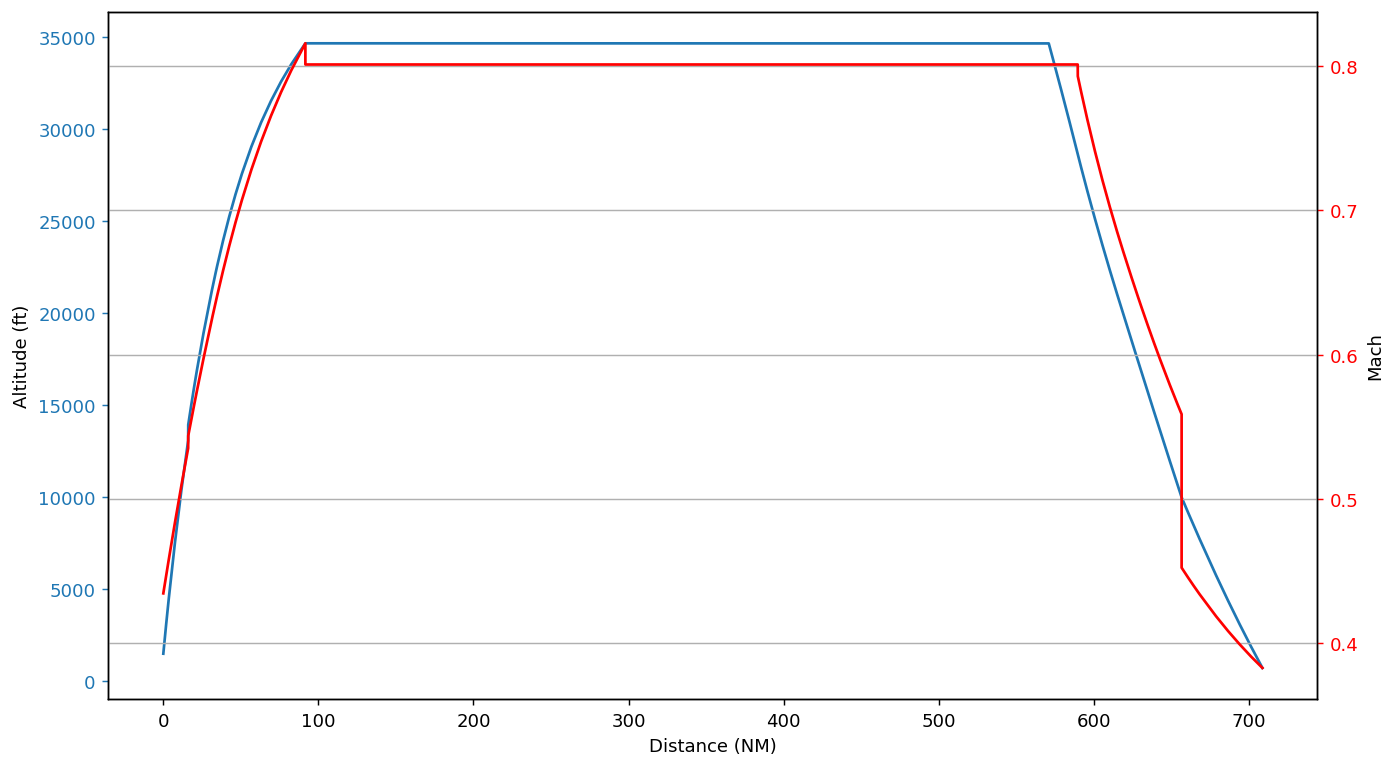

In [14]:
altitude = np.array(output["altitude"][0].split(']')[0].split('[')[1].split()).astype(float)
mach = np.array(output["mach"][0].split(']')[0].split('[')[1].split()).astype(float)
distance = np.array(output["distance"][0].split(']')[0].split('[')[1].split()).astype(float)
draw_figure(distance,altitude, mach, "Distance (NM)", "Altitude (ft)", "Mach")

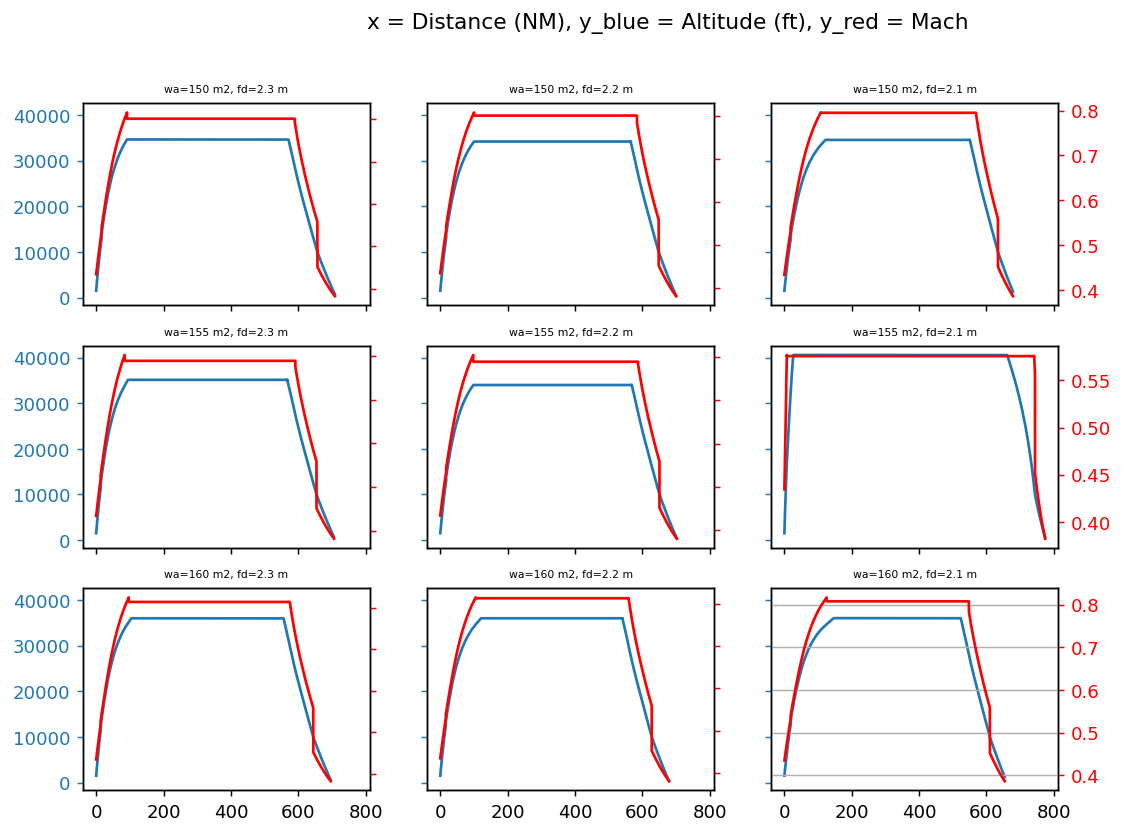

In [15]:
draw_figure_alt_mach_multi(np.array(output["distance"]),np.array(output["altitude"]),np.array(output["mach"]), 3, 3, "Distance (NM)", "Altitude (ft)", "Mach", input["WingArea"],input["FanDiameter"]/10)

In [16]:
input["WingArea"]

0    150.0
1    150.0
2    150.0
3    155.0
4    155.0
5    155.0
6    160.0
7    160.0
8    160.0
Name: WingArea, dtype: float64